In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import  StandardScaler
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier

#LECTURA DATOS
df=pd.read_csv('fs.csv',sep=';')


In [19]:
df=df.dropna()

In [20]:
import statsmodels.formula.api as sfm #Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
import pandas as pd #Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix #Herramienta de Pandas para diagramas de dispersión en matriz.
import matplotlib.pyplot as plt #Biblioteca para la salida gráfica.
import numpy as np # Biblioteca de funciones matemáticas.

In [21]:
lm = sfm.ols(formula="FLUJO~MES+FS", data=df).fit() #NOX = regresando, NO+NO2 = regresores
#ols = Ordinary Least Squares o "mínimos cuadrados ordinarios"
lm.params #parametros de la ecuación

Intercept    -391.120920
MES            19.498887
FS           1787.160579
dtype: float64

In [22]:
lm.pvalues

Intercept    5.108949e-01
MES          6.932128e-01
FS           8.330814e-07
dtype: float64

U:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


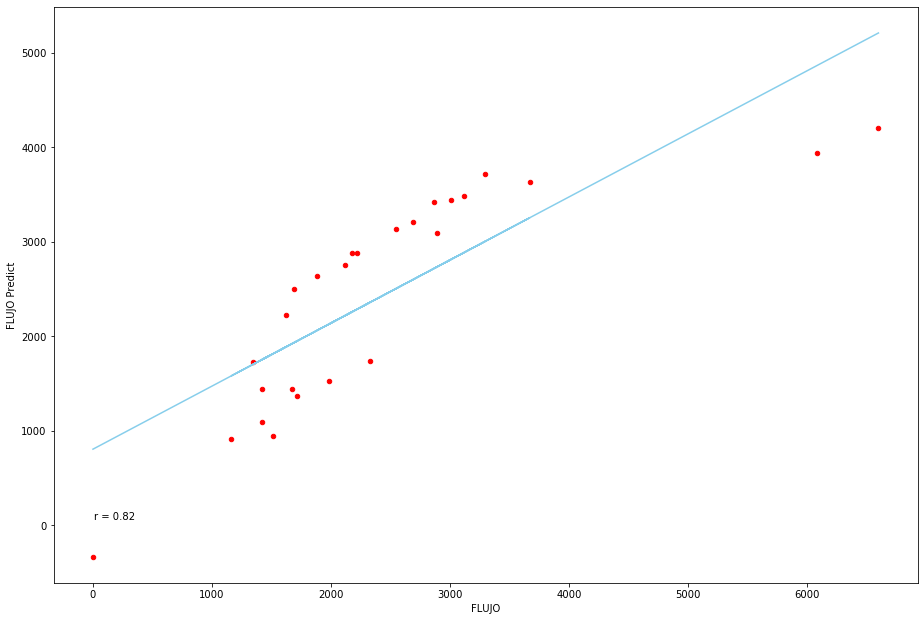

In [23]:
FLUJO = lm.predict(df[["MES", "FS"]])
df["FLUJO_predict"] = FLUJO

x = df["FLUJO"]
y = df["FLUJO_predict"] 

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.xlabel("FLUJO")
plt.ylabel("FLUJO Predict")
plt.plot(x, a * x + b, color="skyblue")
plt.text(10,55, 'r = {0:2.2f}'.format(r[0,1]))
#plt.text(10,55, 'NO$_x$ = {0:2.2f} NO$_x$ Predict + {1:2.3f}'.format(a,b))
#plt.savefig("C:/Users/heber/Desktop/CURSO_GRAFICOS_EN_PYTHON/Regresión Lineal Multiple/nox_predict.png", dpi=300) #ruta imagen guardada
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()

In [36]:
test=pd.DataFrame([])

test['FS']=np.linspace(0, 6, 100)
test['MES']=np.linspace(3, 3, 100)


In [39]:



out=lm.predict(test[["FS", "MES"]])

In [43]:
out.to_csv('out.csv',sep=';')

test.to_csv('test.csv',sep=';')